# PFA PROJECT : ANALYSIS OF IPL


### RANOJOY SENGUPTA (A010)
##### The dataset used for this analysis is that of all the IPL matches from 2008 to 2019. The dataset also contains the ball-by-ball analysis of all these games.


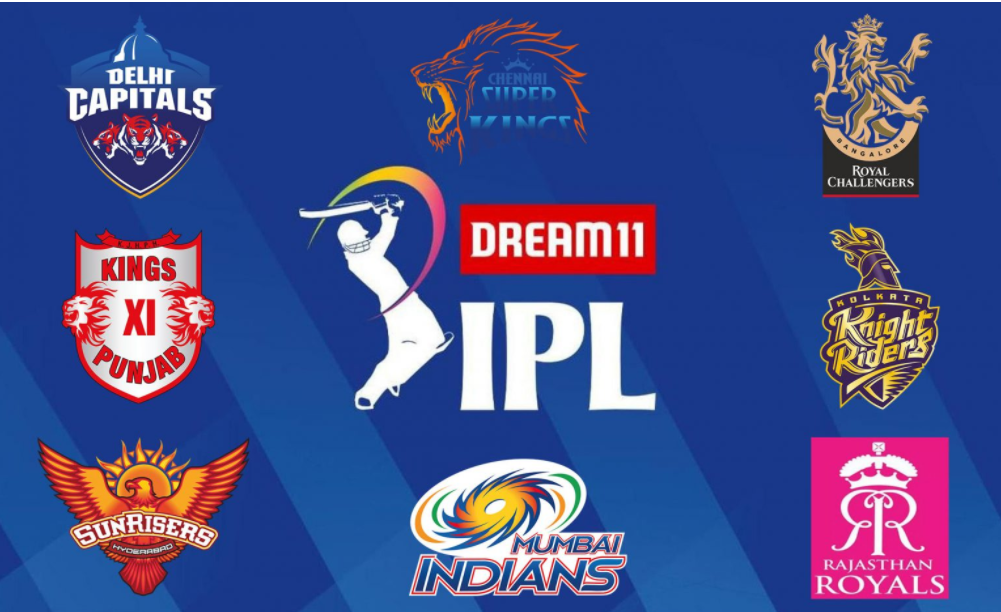

In [1]:
from IPython.display import Image
Image(filename="ipl.png",width=800,height=500)

In [2]:
#Importing the required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
ipl=pd.read_csv('D:\Python Datasets\IPL_DATASET_2008-2019_MATCHES.csv') #Importing the dataset of IPL matches from 2008 to 2019

In [4]:
balls=pd.read_csv('D:\Python Datasets\IPL_DATASET_2008-2019_DELIVERIES.csv') #Importing the dataset of ball-by-ball analysis of IPL matches from 2008 to 2019

In [5]:
ipl.tail(2)

ID  Season           City        Date           Team1  \
754  755    2019  Visakhapatnam  10-05-2019  Delhi Capitals   
755  756    2019      Hyderabad  12-05-2019  Mumbai Indians   

                   Team2          Toss_Winner Toss_Decision  Result  \
754  Chennai Super Kings  Chennai Super Kings         field  normal   
755  Chennai Super Kings       Mumbai Indians           bat  normal   

     dl_applied               Winner  win_by_runs  win_by_wickets  \
754           0  Chennai Super Kings            0               6   
755           0       Mumbai Indians            1               0   

    player_of_match                               Venue        Umpire1  \
754    F du Plessis                    ACA-VDCA Stadium  Sundaram Ravi   
755       JJ Bumrah  Rajiv Gandhi Intl. Cricket Stadium    Nitin Menon   

            Umpire2  
754  Bruce Oxenford  
755       Ian Gould

In [6]:
balls.tail(2)

match_id  inning         batting_team    bowling_team  over  ball  \
179076       756       2  Chennai Super Kings  Mumbai Indians    20     5   
179077       756       2  Chennai Super Kings  Mumbai Indians    20     6   

          batsman non_striker      bowler  is_super_over  ...  bye_runs  \
179076  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   
179077  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
179076            0            0             0             2           0   
179077            0            0             0             0           0   

        total_runs  player_dismissed dismissal_kind fielder  
179076           2               NaN            NaN     NaN  
179077           0         SN Thakur            lbw     NaN  

[2 rows x 21 columns]

In [7]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               756 non-null    int64 
 1   Season           756 non-null    int64 
 2   City             749 non-null    object
 3   Date             756 non-null    object
 4   Team1            756 non-null    object
 5   Team2            756 non-null    object
 6   Toss_Winner      756 non-null    object
 7   Toss_Decision    756 non-null    object
 8   Result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  Winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  Venue            756 non-null    object
 15  Umpire1          755 non-null    object
 16  Umpire2          755 non-null    object
dtypes: int64(5), object(12)
memory usag

In [8]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Cleaning The Data

In [9]:
#Replacing the names of the venues with the proper names
ipl.Venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)
#Delhi Daredevils changed its name to Delhi Capitals
#Replacing the name DD to DC for first dataset
ipl.Team1.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True,inplace=True)
ipl.Team2.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True,inplace=True)
ipl.Toss_Winner.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True,inplace=True)
ipl.Winner.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True,inplace=True)

In [10]:
#Delhi Daredevils changed its name to Delhi Capitals
#Replacing the name DD to DC for second dataset
balls.batting_team.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True,inplace=True)
balls.bowling_team.replace({'Delhi Daredevils':'Delhi Capitals'},regex=True,inplace=True)
balls.batting_team.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},regex=True,inplace=True)
balls.bowling_team.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},regex=True,inplace=True)

# General Analysis of IPL

In [11]:
#Checking the number of games played in each season of the IPL
ipl.Season.value_counts()
fig = px.pie(names = ipl.Season.value_counts().index, values = ipl.Season.value_counts().values,title = "Number Of Matches played in each season ",hole = 0.40)
fig.update_traces(textinfo='value')
fig.show()

In [12]:
city=ipl['City'].value_counts() #Calculating which cities have hosted the most games
city[:15] #Displaying the Top 15 Cities that have host the most games

Mumbai           101
Kolkata           77
Delhi             74
Bangalore         66
Hyderabad         64
Chennai           57
Jaipur            47
Chandigarh        46
Pune              38
Durban            15
Bengaluru         14
Visakhapatnam     13
Ahmedabad         12
Centurion         12
Mohali            10
Name: City, dtype: int64

Text(0.5, 1.0, 'No. of games played in each stadium')

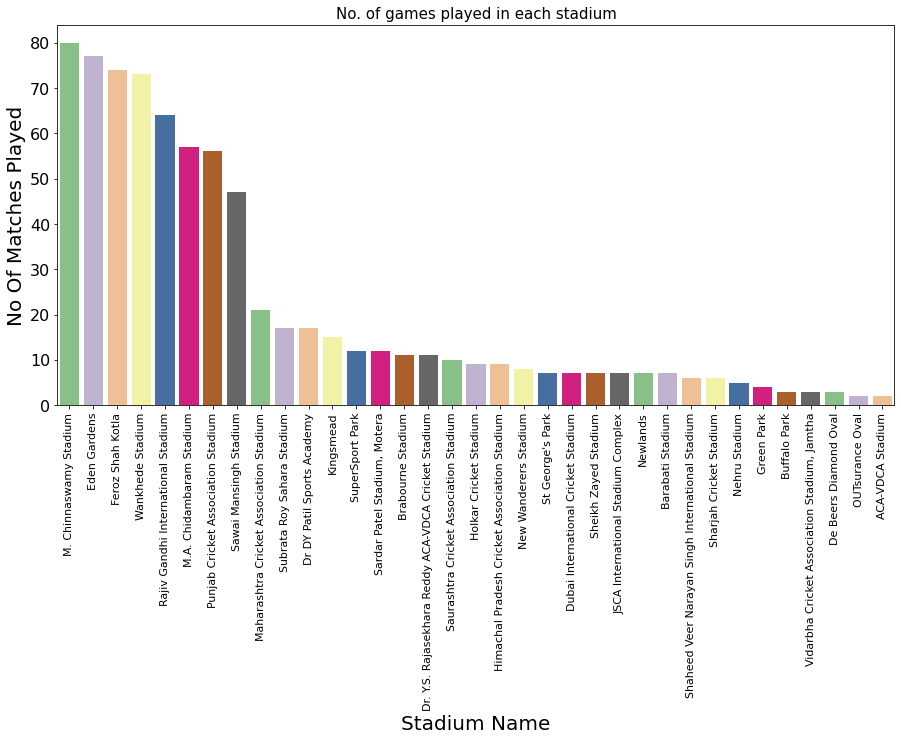

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(ipl['Venue'],order=ipl['Venue'].value_counts().index,palette='Accent')
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=16)
plt.xlabel('Stadium Name',fontsize=20)
plt.ylabel('No Of Matches Played',fontsize=20)
plt.title('No. of games played in each stadium',fontsize=15)

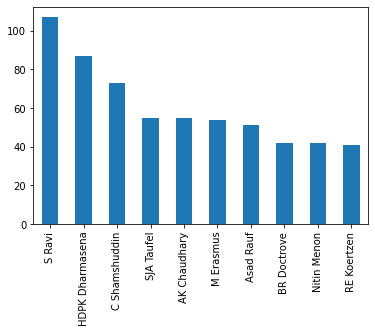

In [14]:
ump=pd.concat([ipl['Umpire1'],ipl['Umpire2']]) #Checking the number of matches each umpire has been involved in
ump=ump.value_counts()
ump[0:10].plot(kind='bar') #Displaying the Top 10 umpires that have officiated the most IPL games

In [15]:
# Checking the frequency of different match results in IPL from 2008-2019
Match_Results=ipl['Result'].value_counts() 
Match_Results                              

normal       743
tie            9
no result      4
Name: Result, dtype: int64

##### 743 games yielded results while 9 games were decided by a super over
##### Only 4 games ended without any results which might have occured due to rain

## Toss Analysis

In [16]:
toss=ipl['Toss_Winner'].value_counts() #Checking the teams who have won the toss the maximum times
toss

Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Kochi Tuskers Kerala            8
Name: Toss_Winner, dtype: int64

In [17]:
decision=ipl['Toss_Decision'].value_counts() #Checking what teams prefer after winning the toss
decision

field    463
bat      293
Name: Toss_Decision, dtype: int64

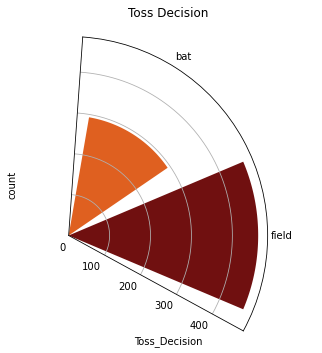

In [18]:
fig=plt.figure(figsize=(5,5))  #Plotting the toss decisions
plt.subplot(polar=True)
sns.countplot(x='Toss_Decision',data=ipl,palette='gist_heat')
plt.title('Toss Decision')
plt.tight_layout()

##### Most teams choose to field after winning the toss
##### A probable reason for this is since it is 20 overs game teams prefer to chase a score than set a target as it is an easier option

In [19]:
np.sum(ipl['Toss_Winner']==ipl['Winner'])

393

In [20]:
# Calculating the percentage of time the toss winner has won the game
(393/756)

0.5198412698412699

##### Almost 52 percent of the time the team winning the toss wins the game
##### Around 48 percent of the time the team losing the toss wins the game
##### We can say that the toss is not a big factor in deciding the outcome of the game as it is a T-20 game

In [21]:
ipl.dropna(inplace=True) #Dropping the columns of the 13 matches which did not yield a result(9 draws and 4 No Results)

In [22]:
#If winning the toss results in winning the game there is an impact of the toss
ipl.loc[ipl['Toss_Winner'] == ipl['Winner'], 'Toss_Impact'] = 'Yes'  
ipl.loc[ipl['Toss_Winner'] != ipl['Winner'], 'Toss_Impact'] = 'No' 

In [23]:
toss=ipl['Toss_Impact'].value_counts()
toss

Yes    389
No     355
Name: Toss_Impact, dtype: int64

In [24]:
toss_venue=ipl.groupby(['Venue','Toss_Impact'])['Toss_Impact'].count().sort_values(ascending=False) #Studying the impact of winning the toss on match results in various grounds

In [25]:
toss_venue[0:5]

Venue                               Toss_Impact
Eden Gardens                        Yes            43
Rajiv Gandhi International Stadium  No             43
M. Chinnaswamy Stadium              Yes            42
Feroz Shah Kotla                    Yes            38
Wankhede Stadium                    Yes            37
Name: Toss_Impact, dtype: int64

##### In Chinnaswamy Stadium the Team winning the toss mostly wins the game
##### In Eden Gardens the Team winning the toss also wins most games
##### In Feroz Shah Kotla also toss significantly affects the game result
##### In these 3 cities winning the toss can be an important factor in deciding the outcome of the game
##### In Rajiv Gandhi International Stadium the toss winner has hardly become the match winner

[Text(0, 0.5, 'Number Of Games Won'), Text(0.5, 0, 'Team')]

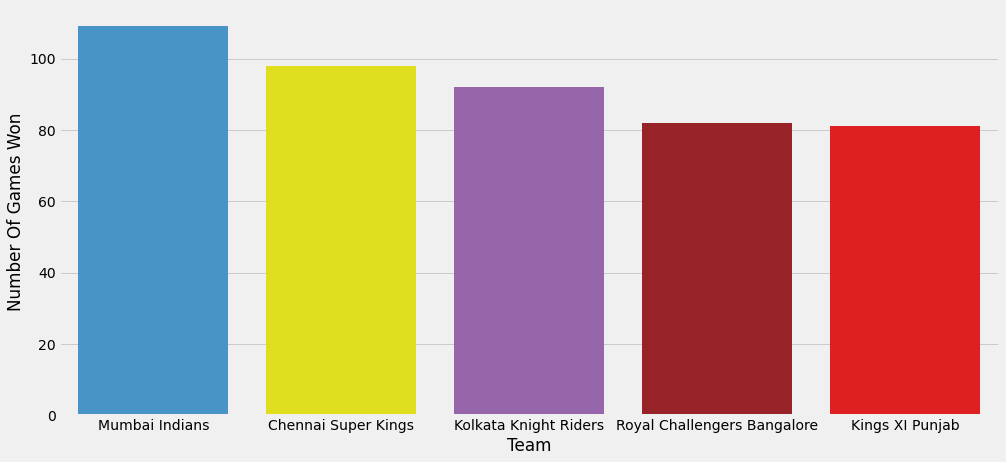

In [26]:
plt.style.use(['fivethirtyeight'])
plt.figure(figsize=(15,7))
enmax_palette = ['#3498db','yellow' ,'#9b59b6', '#aa1016','red']
sns.set_palette(palette=enmax_palette)
ax=sns.barplot(list(ipl['Winner'].value_counts()[0:5].keys()),list(ipl['Winner'].value_counts()[0:5])) #Calculating the number of games each team has won and displaying the top 5 teams
ax.set(ylabel='Number Of Games Won', xlabel='Team')

In [27]:
total_wins=pd.DataFrame({'TotalMatches': ipl.Team1.value_counts()+ipl.Team2.value_counts()
                         ,'TotalWin':ipl.Winner.value_counts()})
total_wins.sort_values(by='TotalWin',ascending=False) #Displaying the teams with the most wins

TotalMatches  TotalWin
Mumbai Indians                        184       109
Chennai Super Kings                   162        98
Kolkata Knight Riders                 177        92
Royal Challengers Bangalore           174        82
Kings XI Punjab                       175        81
Delhi Capitals                        172        76
Rajasthan Royals                      144        75
Sunrisers Hyderabad                   106        56
Deccan Chargers                        75        29
Rising Pune Supergiants                30        15
Gujarat Lions                          30        13
Pune Warriors                          45        12
Kochi Tuskers Kerala                   14         6

In [28]:
win_percent=(total_wins['TotalWin'])/(total_wins['TotalMatches'])*100
win_percent=win_percent.sort_values(ascending=False)[0:13] #Checking the teams with highest win percentage in the IPL
win_percent

Chennai Super Kings            60.493827
Mumbai Indians                 59.239130
Sunrisers Hyderabad            52.830189
Rajasthan Royals               52.083333
Kolkata Knight Riders          51.977401
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    47.126437
Kings XI Punjab                46.285714
Delhi Capitals                 44.186047
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Deccan Chargers                38.666667
Pune Warriors                  26.666667
dtype: float64

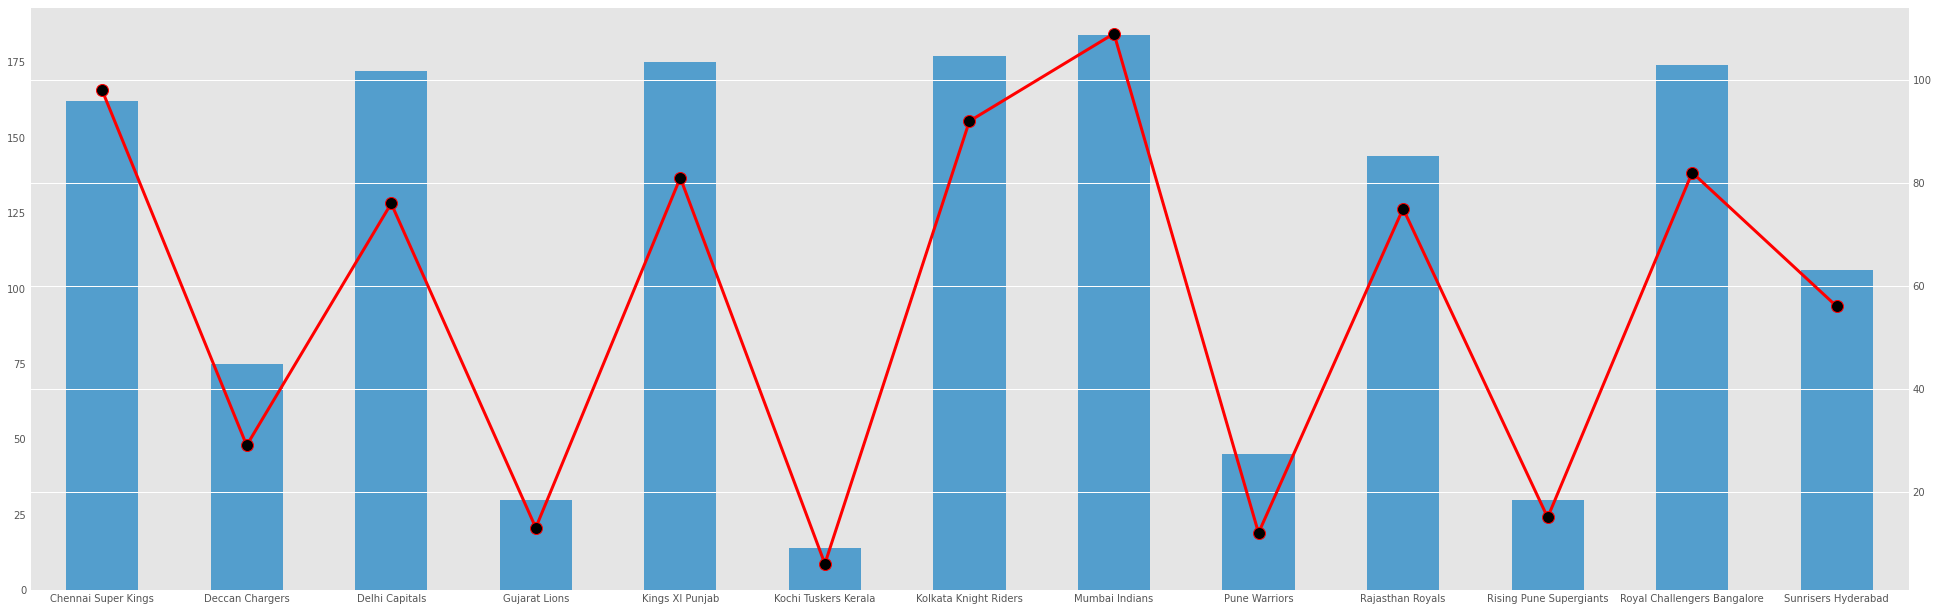

In [29]:
#The Total Matches Played are represented by the Bar Graph
#The Total Matches Won are represented by the Line Graph
plt.style.use(['ggplot'])
plt.figure(figsize=(30,10))
total_wins['TotalMatches'].plot(kind='bar',color='#539ecd')
total_wins['TotalWin'].plot(kind='line',linewidth=3,linestyle='solid', marker='o',markerfacecolor='black', markersize=12,color='red',secondary_y=True)
plt.show()

##### Even though MI has won the most games CSK has a slightly better Win Percentage 
##### SRH,RR,KKR have all won more than half the games they have played
##### PWI have the worst Win Percent Record

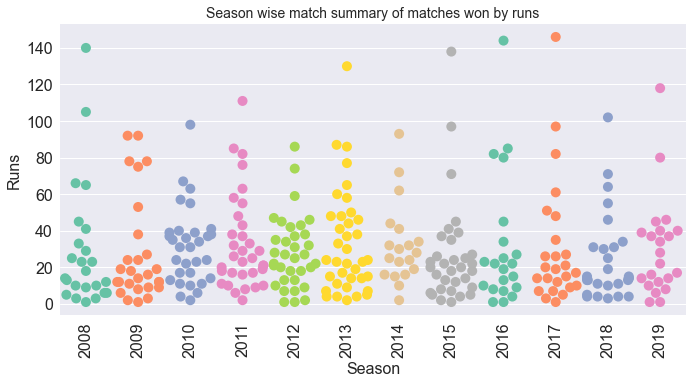

In [30]:
# Checking by how many runs the matches were won in each season
plt.style.use(['seaborn'])
plt.figure(figsize=(10,5))
sns.swarmplot(ipl['Season'],ipl[ipl['win_by_runs']!=0]['win_by_runs'],s=10,palette='Set2')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Season',fontsize=16)
plt.ylabel('Runs',fontsize=16)
plt.title('Season wise match summary of matches won by runs',fontsize=14)
plt.show()

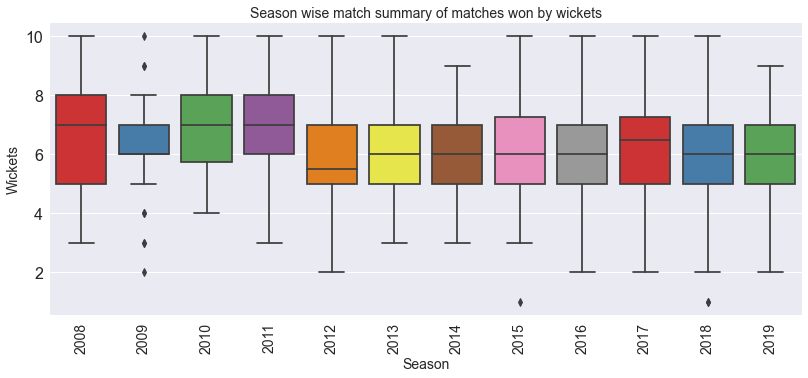

In [31]:
#Checking by how many wickets the matches were won in each season
plt.style.use(['seaborn-darkgrid'])
plt.figure(figsize=(12,5))
sns.boxplot(ipl['Season'],ipl[ipl['win_by_wickets']!=0]['win_by_wickets'],palette='Set1')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Wickets',fontsize=14)
plt.title('Season wise match summary of matches won by wickets',fontsize=14)
plt.show()

In [32]:
#Checking the players who have won the most MOTM 
Top_10_MVP=ipl['player_of_match'].value_counts()[0:10]
Top_10_MVP

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

[Text(0, 0.5, 'Frequency of MOTM'), Text(0.5, 0, 'Player Name')]

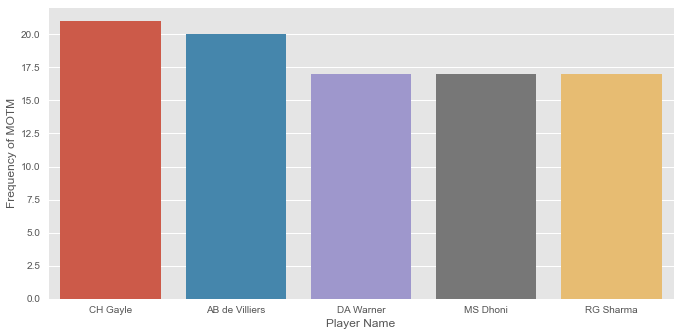

In [33]:
plt.style.use(['ggplot'])
plt.figure(figsize=(10,5))
ax=sns.barplot(list(ipl['player_of_match'].value_counts()[0:5].keys()),list(ipl['player_of_match'].value_counts()[0:5]))
ax.set(xlabel='Player Name', ylabel='Frequency of MOTM')

##### Chris Gayle has been the most valuable player from 2008 to 2019
##### ABD, Warner,Rohit Sharma and MSD have also been very influential for their teams in the IPL

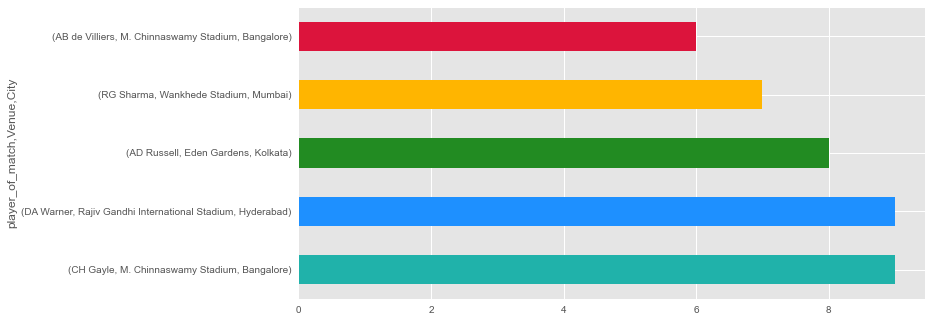

In [34]:
plt.style.use(['seaborn-deep'])
plt.figure(figsize=(10,5))
MOTM_venue = ipl.groupby(["player_of_match",'Venue','City'])['ID'].count().sort_values(ascending=False)[:5] #Evaluating the best 5 players in their home ground 
MOTM_venue.plot(kind='barh',color=['lightseagreen','dodgerblue','forestgreen','#ffb500','crimson'])

##### Gayle,Warner,Kohli,ABD and Rohit Sharma have won the most MOTM at their home grounds
##### Teams might want to have a plan against them in these grounds to dismiss them early or they could win their teams games on their own
##### Sunil Narine has been very important to KKR in Eden Gardens.This might be because Edens has a slow turning pitch

## Batsman Analysis

In [35]:
total_runs=balls.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
total_runs=total_runs.sort_values(by='Runs',ascending=False)
top_10_batsmen=total_runs[:10] 
print('The Top 10 Batsmen in thr Tournament are:\n',top_10_batsmen)

The Top 10 Batsmen in thr Tournament are:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


Text(0.5, 1.0, 'Top 10 Highest Run Getter in IPL')

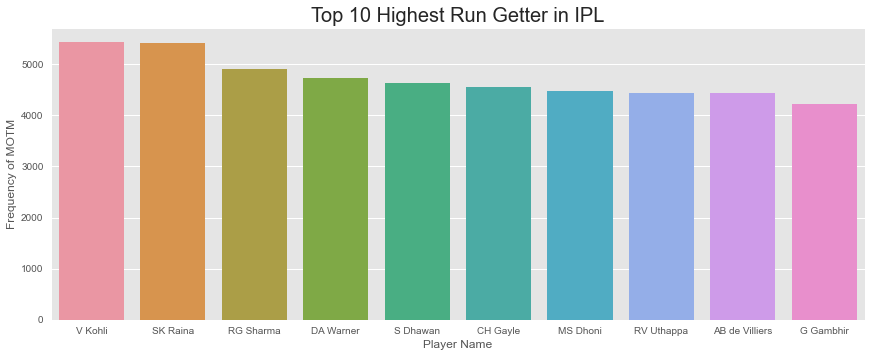

In [36]:
plt.style.use(['ggplot'])
plt.figure(figsize=(13,5))
ax=sns.barplot(top_10_batsmen['batsman'],top_10_batsmen['Runs'])
ax.set(xlabel='Player Name', ylabel='Frequency of MOTM')
plt.title('Top 10 Highest Run Getter in IPL',size=20)

##### Virat Kohli has been the most successful run scorer in the IPL closely followed by Suresh Raina.This is not surprising as they have been the most consistent batsmen over this period
##### Rohit Sharma, Dhawan and David Warner are the other batsmen in the Top 5 list
##### Chris Gayle misses out on the Top 5 spot despite having the most centuries and highest individual score as he is not as consistent
##### 8 out of the top 10 highest run getter play in the Top 3 batting positions for their teams. This suggests that these are the best batting position to score runs
##### MSD despite coming lower down the order features in the Top 10. This is probably because he is one of the best finishers the game has ever seen

In [37]:
fours = balls[ balls["batsman_runs"] == 4] #Slicing only to access the rows where the runs scored are 4 
sixes = balls[ balls["batsman_runs"] == 6] #Slicing only to access the rows where the runs scored are 6

In [38]:
total_fours=fours.groupby(['batsman'])['batsman_runs'].count().sort_values(ascending=False)[:10] #Grouping by batsmen to calculate the top 10 boundary hitters
total_fours

batsman
S Dhawan      526
SK Raina      495
G Gambhir     492
V Kohli       482
DA Warner     459
RV Uthappa    436
RG Sharma     431
AM Rahane     405
CH Gayle      376
PA Patel      366
Name: batsman_runs, dtype: int64

Text(0.5, 1.0, 'Top 10 Batsmen with most boundaries ')

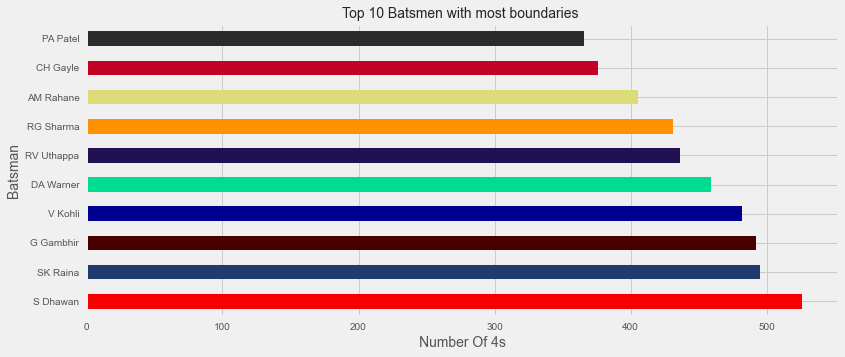

In [39]:
plt.style.use(['fivethirtyeight'])
plt.figure(figsize=(12,5))
total_fours.plot(kind='barh',color=['#f90000','#213b6e','#480000','#000090','#00db92','#221150','#fe9200','#dbdb77','#c20325','#2b2b2b'])
plt.xlabel('Number Of 4s',fontsize=14)
plt.ylabel('Batsman',fontsize=14)
plt.title('Top 10 Batsmen with most boundaries ',fontsize=14)

##### Dhawan is the only batsman to hit more than 500 boundaries
##### All the 10 batsmen are openers for their respective teams

In [40]:
total_sixes=sixes.groupby(['batsman'])['batsman_runs'].count().sort_values(ascending=False)[:10]
total_sixes

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman_runs, dtype: int64

Text(0.5, 1.0, 'Batsmen with most 6s')

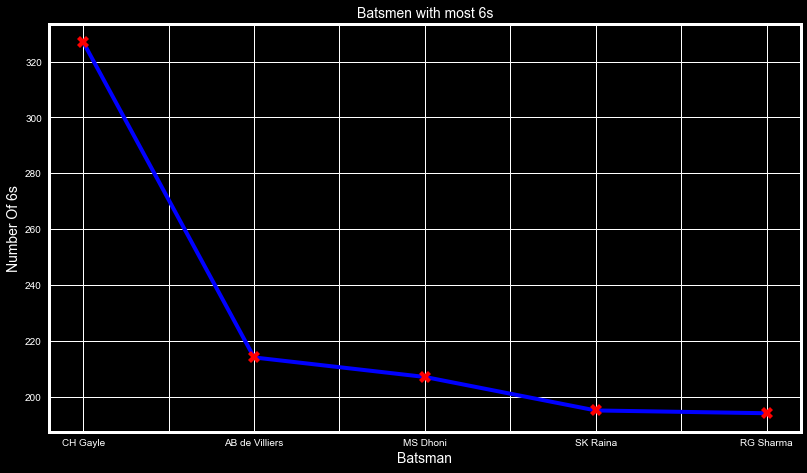

In [41]:
plt.style.use(['dark_background'])
plt.figure(figsize=(12,7))
total_sixes[:5].plot(kind='line',marker='X',markerfacecolor='red',markersize=12,color='blue')
plt.xlabel('Batsman',fontsize=14)
plt.ylabel('Number Of 6s',fontsize=14)
plt.title('Batsmen with most 6s',fontsize=14)

##### Chris Gayle has hit the maximum number of sixes which is 327
##### ABD who occupies the second spot has hit less than 100 sixes as compared to Gayle
##### MSD, Pollard and Yusuf Pathan are the only middle order batsmen who feature in the list

In [42]:
minimum_runs=1000
batting_tot=balls.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsman_balls_faced=balls.groupby('batsman').count()
batsman_balls_faced_count=batsman_balls_faced['ball'].reset_index(name='Balls Faced')
batsman_runs_balls=pd.merge(batting_tot,batsman_balls_faced_count,left_on='batsman',right_on='batsman',how='outer')
batsman_strike_rate=batsman_runs_balls.groupby(['batsman','Runs']).apply(lambda x:((x['Runs'])/(x['Balls Faced']))*100).reset_index(name='Strike Rate')

In [43]:
batsman_strike_rate_list=batsman_strike_rate.sort_values(by='Strike Rate',ascending=False)
batsman_strike_rate_above_minimum_runs=batsman_strike_rate_list[batsman_strike_rate_list['Runs']>=minimum_runs]
top_strike_rate_batsman=batsman_strike_rate_above_minimum_runs.loc[:,['batsman','Runs','Strike Rate']][0:100]
print('The Top 10 batsmen having highest strike rate, scoring atleast {} Runs:\n'.format(minimum_runs),top_strike_rate_batsman[:10])

The Top 10 batsmen having highest strike rate, scoring atleast 1000 Runs:
             batsman  Runs  Strike Rate
34       AD Russell  1445   179.950187
374         RR Pant  1792   162.318841
153      GJ Maxwell  1403   155.543237
163       HH Pandya  1118   151.902174
189      JC Buttler  1431   150.000000
488        V Sehwag  2728   148.827059
26   AB de Villiers  4428   148.740343
92         CH Gayle  4560   145.640370
213      KA Pollard  2784   141.751527
112       DA Warner  4741   139.523249


In [44]:
plt.figure(figsize=(15,5))
fig = px.scatter(x=top_strike_rate_batsman['Runs'], y=top_strike_rate_batsman['Strike Rate'], color=top_strike_rate_batsman['batsman'],
                 size=top_strike_rate_batsman['Runs'],title='Overall Runs vs Strike Rate Analysis',labels={'x':'Total Runs', 'y':'Strike Rate'})

fig.show()

<Figure size 1080x360 with 0 Axes>

##### Andre Russell has the best Strike Rate in the IPL for batsmen scoring a minimum of 1000 runs
##### Pant,Maxwell,Pandya and Buttler all have a Strike Rate of greater than equal to 150

In [45]:
orange=ipl[['ID','Season']]
orange=orange.merge(balls,left_on='ID',right_on='match_id',how='left')
orange=orange.groupby(['Season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["Season"],keep="first")
orange_cap_holder=orange.sort_values(by='Season')
orange_cap_holder

Season        batsman  batsman_runs
115     2008       SE Marsh           616
229     2009      ML Hayden           572
446     2010   SR Tendulkar           618
502     2011       CH Gayle           608
684     2012       CH Gayle           733
910     2013     MEK Hussey           733
1088    2014     RV Uthappa           605
1145    2015      DA Warner           562
1380    2016        V Kohli           973
1419    2017      DA Warner           641
1591    2018  KS Williamson           747
1692    2019      DA Warner           727

Text(0.5, 1.0, 'Orange Cap Holders & Runs Scored In That Season')

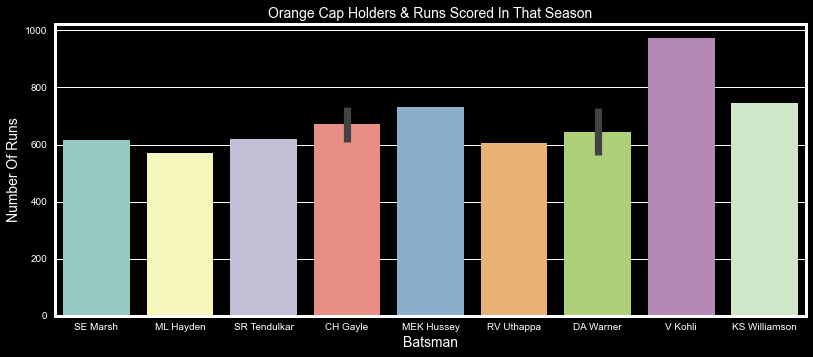

In [46]:
plt.style.use(['dark_background'])
plt.figure(figsize=(12,5))
sns.barplot(x=orange_cap_holder['batsman'],y=orange_cap_holder['batsman_runs'])
plt.xlabel('Batsman',fontsize=14)
plt.ylabel('Number Of Runs',fontsize=14)
plt.title('Orange Cap Holders & Runs Scored In That Season',fontsize=14)

##### Virat Kohli was the highest run getter in a single season among the Orange Cap winners
##### David Warner is the only batsman to win the orange cap 3 times (2015,2017,2019)
##### Chris Gayle and Virat Kohli are the batsmen to win the Orange cap twice
##### All the Orange Cap winners are opening batsmen of their teams
##### A possible reason is that the openers face the maximum number of deliveries 


## Bowler Analysis

In [47]:
dismissal_type=balls['dismissal_kind'].value_counts()
dismissal_type

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

Text(0.5, 1.0, 'Frequency Vs Dismissal Type')

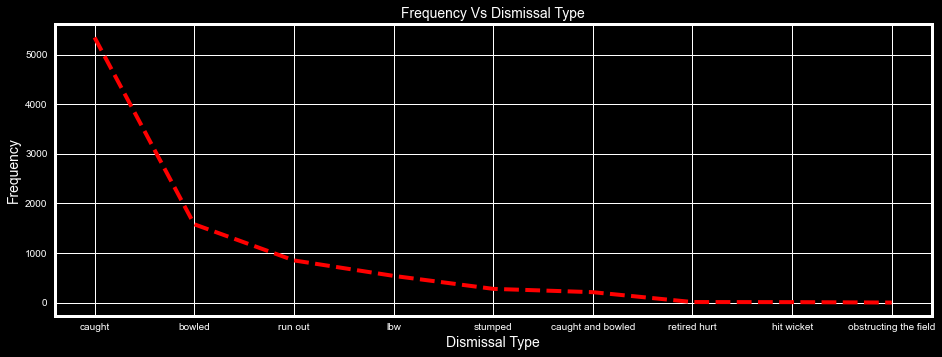

In [48]:
plt.style.use(['dark_background'])
plt.figure(figsize=(14,5))
dismissal_type.plot(kind='line',linestyle='--',color='red')
plt.xlabel('Dismissal Type',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Frequency Vs Dismissal Type',fontsize=14)

##### There have been over 5000 dismissals which are caught. This might be because it is a T-20 game and batsmen are looking to hit 4s and 6s
##### The second most common dismissal kind is bowled which is less than one-third of caught dismissals

In [49]:
wickets=balls[balls['dismissal_kind']!='run out'] #Run Outs are not awarded to the bowlers
total_wickets=wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
wickets_count=total_wickets.groupby('bowler').count().reset_index() #Counting the total wickets taken by each bowlers
top_bowlers=wickets_count.sort_values(by='Wickets',ascending=False)
top_10_bowlers=top_bowlers.loc[:,['bowler','Wickets']][0:10] 
top_10_bowlers

bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108

Text(0.5, 1.0, 'Top 10 Highest Wicket Takers in IPL')

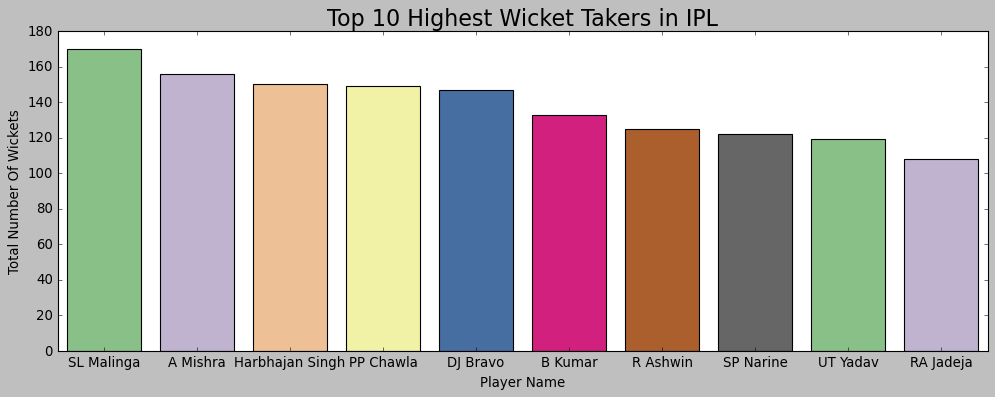

In [50]:
plt.style.use(['classic'])
plt.figure(figsize=(15,5))
ax=sns.barplot(top_10_bowlers['bowler'],top_10_bowlers['Wickets'],palette='Accent')
ax.set(xlabel='Player Name', ylabel='Total Number Of Wickets')
plt.title('Top 10 Highest Wicket Takers in IPL',size=20)

##### Malinga has been the best bowler in the IPL in the 12 years
##### There are 6 spinners in the Top 10 wicket takers. We can conclude that spinners have a greater impact on the game as compared to pacers

In [51]:
minimum_balls=1000
bowling_runs=balls.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=balls.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowler_stats=pd.merge(bowling_runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')
bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')

In [52]:
best_economy_rate=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
best_economy_rate=best_economy_rate[best_economy_rate['Balls Bowled']>=minimum_balls]
top_10_economical_bowlers=best_economy_rate.loc[:,['bowler','Balls Bowled','Economy Rate']][0:100]
print('The Top 10 bowlers having best economy rate, bowling atleast {} balls:\n'.format(minimum_balls),top_10_economical_bowlers[:10])

The Top 10 bowlers having best economy rate, bowling atleast 1000 balls:
               bowler  Balls Bowled  Economy Rate
108         DW Steyn          2207      6.671500
207   M Muralitharan          1581      6.698292
269         R Ashwin          3016      6.746021
347        SP Narine          2600      6.782308
301      Rashid Khan          1106      6.819168
126  Harbhajan Singh          3451      7.041437
340       SL Malinga          2974      7.083389
339         SK Warne          1223      7.187244
202         M Kartik          1182      7.197970
53           B Kumar          2707      7.234577


In [53]:
plt.figure(figsize=(15,5))
fig = px.scatter(x=top_10_economical_bowlers['Balls Bowled'], y=top_10_economical_bowlers['Economy Rate'], color=top_10_economical_bowlers['bowler'],
                 size=top_10_economical_bowlers['Balls Bowled'],title='Minimum Balls Bowled vs Economy Rate Analysis',labels={'x':'Total Balls Bowled', 'y':'Economy Rate'})

fig.show()

<Figure size 1200x400 with 0 Axes>

In [54]:
purple=ipl[['ID','Season']]
purple=purple.merge(balls,left_on='ID',right_on='match_id',how='left')
purple=purple.groupby(['Season','bowler'])['player_dismissed'].count().reset_index()
purple=purple.sort_values('player_dismissed',ascending=0)
purple=purple.drop_duplicates(subset=["Season"],keep="first")
purple_cap_holder=purple.sort_values(by='Season')
purple_cap_holder

Season         bowler  player_dismissed
84      2008  Sohail Tanvir                24
174     2009       RP Singh                26
284     2010        PP Ojha                22
446     2011     SL Malinga                30
535     2012       M Morkel                30
627     2013       DJ Bravo                34
809     2014      SP Narine                21
844     2015       DJ Bravo                28
935     2016        B Kumar                24
1045    2017        B Kumar                28
1141    2018         AJ Tye                28
1276    2019       K Rabada                28

Text(0.5, 1.0, 'Purple Cap Holders & Wickets Taken In That Season')

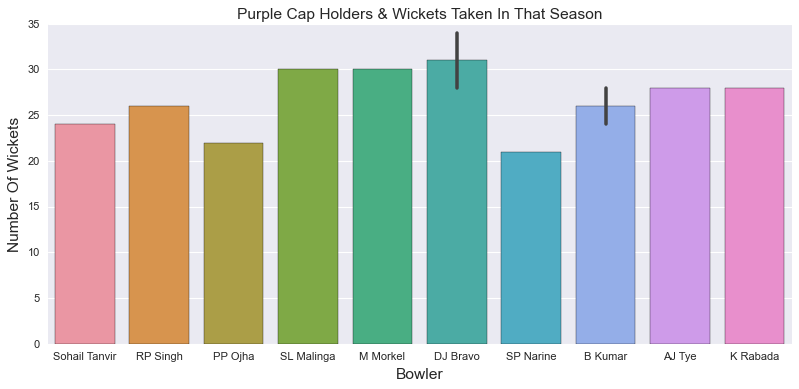

In [55]:
plt.style.use(['seaborn'])
plt.figure(figsize=(12,5))
sns.barplot(x=purple_cap_holder['bowler'],y=purple_cap_holder['player_dismissed'])
plt.xlabel('Bowler',fontsize=14)
plt.ylabel('Number Of Wickets',fontsize=14)
plt.title('Purple Cap Holders & Wickets Taken In That Season',fontsize=14)

##### Sunil Narine has taken the most wickets in a seaon among the Purple Cap winners
##### B Kumar and D Bravo are the only two bowlers to feature on the list twice
##### 7 out of the 8 bowlers in this list are pacers even though there are more spinners in Top 10 wicket takers overall

## Fielder Analysis

In [56]:
run_outs=balls[balls['dismissal_kind']=='run out'] 
run_outs.head(2)

match_id  inning                 batting_team         bowling_team  over  \
199         1       2  Royal Challengers Bangalore  Sunrisers Hyderabad    12   
247         1       2  Royal Challengers Bangalore  Sunrisers Hyderabad    20   

     ball      batsman non_striker        bowler  is_super_over  ...  \
199     4    KM Jadhav     TM Head  MC Henriques              0  ...   
247     4  A Choudhary   YS Chahal   BCJ Cutting              0  ...   

     bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
199         0            0            0             0             1   
247         0            0            0             0             0   

     extra_runs  total_runs  player_dismissed dismissal_kind          fielder  
199           0           1         KM Jadhav        run out      BCJ Cutting  
247           0           0         YS Chahal        run out  CJ Jordan (sub)  

[2 rows x 21 columns]

In [57]:
max_run_outs=run_outs['fielder'].value_counts() #Checking for fielders with maximum run-outs/stumpings
top_10_fielders=max_run_outs[:10]
top_10_fielders

MS Dhoni          23
RA Jadeja         20
V Kohli           17
SK Raina          16
AB de Villiers    14
KD Karthik        14
MK Pandey         14
DJ Bravo          12
PA Patel          12
AT Rayudu         10
Name: fielder, dtype: int64

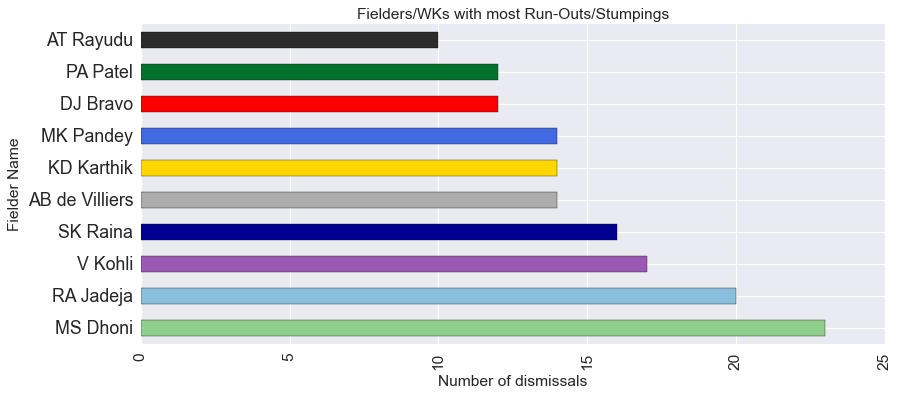

In [58]:
plt.style.use(['seaborn-darkgrid'])
plt.figure(figsize=(12,5))
top_10_fielders.plot(kind='barh',color=['#8ed08b','#89bedc','#9b59b6','#000090','#adadad','gold','royalblue','red','#05712f','#2b2b2b'])
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('Number of dismissals',fontsize=14)
plt.ylabel('Fielder Name',fontsize=14)
plt.title('Fielders/WKs with most Run-Outs/Stumpings',fontsize=14)
plt.show()

##### MSD and DK are two keepers with the most stumpings in the IPL
##### CSK has 4 fielders in the top 10. This suggests that they are a very good fielding side
##### Jadeja has been the best fielder in the IPL excluding the WKs

In [59]:
caught_outs=balls[balls['dismissal_kind']=='caught'] 
caught_outs.head(2)

match_id  inning         batting_team                 bowling_team  over  \
11         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     2   
64         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore    11   

    ball    batsman   non_striker       bowler  is_super_over  ...  bye_runs  \
11     5  DA Warner      S Dhawan  A Choudhary              0  ...         0   
64     3   S Dhawan  MC Henriques    STR Binny              0  ...         0   

    legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
11            0            0             0             0           0   
64            0            0             0             0           0   

    total_runs  player_dismissed dismissal_kind        fielder  
11           0         DA Warner         caught  Mandeep Singh  
64           0          S Dhawan         caught    Sachin Baby  

[2 rows x 21 columns]

In [60]:
max_caught_outs=caught_outs['fielder'].value_counts() #Checking for fielders with maximum catches
top_10_catchers=max_caught_outs[:10]
top_10_catchers

KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          82
KA Pollard         76
V Kohli            73
PA Patel           69
S Dhawan           68
Name: fielder, dtype: int64

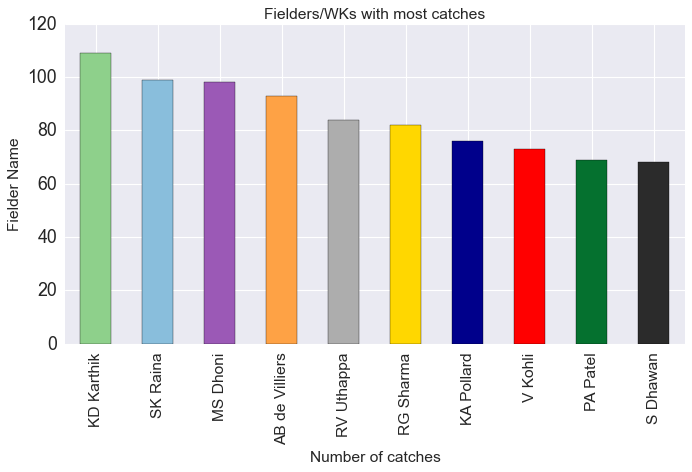

In [61]:
plt.style.use(['seaborn-muted'])
plt.figure(figsize=(10,5))
top_10_catchers.plot(kind='bar',color=['#8ed08b','#89bedc','#9b59b6','#fea245','#adadad','gold','darkblue','red','#05712f','#2b2b2b'])
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('Number of catches',fontsize=14)
plt.ylabel('Fielder Name',fontsize=14)
plt.title('Fielders/WKs with most catches',fontsize=14)
plt.show()

##### DK has the most number of catches in the 12 seasons of IPL
##### There are 4 WKs in this list of fielders with most catches
##### Suresh Raina is the outfield player with the most catches in IPL history

## Super Over Analysis

In [62]:
super_over=balls[balls['is_super_over']==1] 
super_over.tail()

match_id  inning      batting_team      bowling_team  over  ball  \
127365       536       3   Kings XI Punjab  Rajasthan Royals     1     7   
127366       536       4  Rajasthan Royals   Kings XI Punjab     1     1   
127367       536       4  Rajasthan Royals   Kings XI Punjab     1     2   
127368       536       4  Rajasthan Royals   Kings XI Punjab     1     3   
127369       536       4  Rajasthan Royals   Kings XI Punjab     1     4   

            batsman  non_striker      bowler  is_super_over  ...  bye_runs  \
127365     SE Marsh   GJ Maxwell   CH Morris              1  ...         0   
127366    SR Watson  JP Faulkner  MG Johnson              1  ...         0   
127367    SPD Smith  JP Faulkner  MG Johnson              1  ...         0   
127368    SPD Smith  JP Faulkner  MG Johnson              1  ...         0   
127369  JP Faulkner    SPD Smith  MG Johnson              1  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
127365            1            0             0             0           1   
127366            0            0             0             0           0   
127367            0            1             0             4           1   
127368            0            0             0             1           0   
127369            0            0             0             0           0   

        total_runs  player_dismissed dismissal_kind fielder  
127365           1          SE Marsh        run out     NaN  
127366           0         SR Watson         bowled     NaN  
127367           5               NaN            NaN     NaN  
127368           1               NaN            NaN     NaN  
127369           0       JP Faulkner        run out     NaN  

[5 rows x 21 columns]

In [63]:
superover_best_batsman = super_over.groupby(["batsman"])['batsman_runs'].sum().sort_values(ascending=False)[:10]
superover_best_batsman

batsman
CH Gayle          25
YK Pathan         18
CL White          17
AB de Villiers    13
SE Marsh          12
IK Pathan         11
SPD Smith         10
KA Pollard        10
SK Raina           8
MK Pandey          8
Name: batsman_runs, dtype: int64

##### Chris Gayle has scored the most runs in the super overs in the IPL


In [64]:
super_over_4s=super_over[super_over['batsman_runs']==4]
super_over_max_4s=super_over_4s.groupby(['batsman'])['batsman_runs'].count().sort_values(ascending=False)
super_over_max_4s

batsman
SE Marsh        3
CH Gayle        3
Yuvraj Singh    1
YK Pathan       1
V Kohli         1
SR Watson       1
SPD Smith       1
KA Pollard      1
IK Pathan       1
Name: batsman_runs, dtype: int64

##### Shaun Marsh and Chris Gayle have scored the maximum boundaries in the superover

In [65]:
super_over_6s=super_over[super_over['batsman_runs']==6]
super_over_max_6s=super_over_6s.groupby(['batsman'])['batsman_runs'].count().sort_values(ascending=False)
super_over_max_6s

batsman
YK Pathan           2
CL White            2
AB de Villiers      2
SK Raina            1
MK Pandey           1
KA Pollard          1
IK Pathan           1
DPMD Jayawardene    1
CH Gayle            1
Name: batsman_runs, dtype: int64

##### Yusuf Pathan, Cameron White and ABD have each hit 2 sixes in the superovers

In [66]:
super_over_wickets=super_over[super_over['dismissal_kind']!='run out'] #Run Outs are not awarded to the bowlers
total_super_over_wickets=super_over_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
wickets_count=total_super_over_wickets.groupby('bowler').count().reset_index() #Counting the total wickets taken by each bowlers
top_bowlers=wickets_count.sort_values(by='Wickets',ascending=False)
top_bowlers=top_bowlers.loc[:,['bowler','Wickets']] 
top_bowlers

bowler  Wickets
1        J Theron        2
2     JP Faulkner        2
6       R Rampaul        2
0       CH Morris        1
3     Kamran Khan        1
4  M Muralitharan        1
5      MG Johnson        1

##### Theron, Faulkner and Rampaul have the highest wickets in the superovers each having 2 wickets

## Team Analysis

In [67]:
bat_first=ipl[ipl['win_by_runs']!=0] # Extracting team batting first
bat_first.head(2)                    #The team batting second cannot win by runs margin

ID  Season       City        Date                Team1  \
0   1    2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
8   9    2017       Pune  11-04-2017       Delhi Capitals   

                         Team2                  Toss_Winner Toss_Decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
8      Rising Pune Supergiants      Rising Pune Supergiants         field   

   Result  dl_applied               Winner  win_by_runs  win_by_wickets  \
0  normal           0  Sunrisers Hyderabad           35               0   
8  normal           0       Delhi Capitals           97               0   

  player_of_match                                    Venue      Umpire1  \
0    Yuvraj Singh       Rajiv Gandhi International Stadium  AY Dandekar   
8       SV Samson  Maharashtra Cricket Association Stadium  AY Dandekar   

    Umpire2 Toss_Impact  
0  NJ Llong          No  
8    S Ravi          No

In [68]:
batting_first=bat_first['Winner'].value_counts() #Evaluating the teams that have won the most matches batting first
batting_first                                     

Mumbai Indians                 57
Chennai Super Kings            51
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    34
Sunrisers Hyderabad            28
Delhi Capitals                 28
Rajasthan Royals               27
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: Winner, dtype: int64

##### MI and CSK are the two teams best at setting a target
##### They are followed by KXIP, KKR and RCB
##### GL, KTK, PWI,RPS have won very few games when they have batted first

[Text(0, 0.5, 'Games Won Batting First'),
 Text(0.5, 0, 'Team'),
 Text(0.5, 1.0, 'Best Target Setting Teams')]

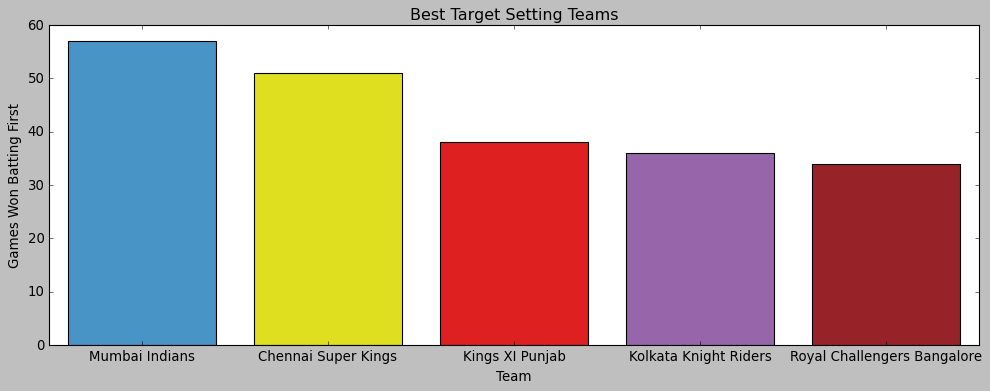

In [69]:
plt.style.use(['classic'])
plt.figure(figsize=(15,5))
enmax_palette = ['#3498db', 'yellow', 'red','#9b59b6', '#aa1016']
sns.set_palette(palette=enmax_palette)
ax=sns.barplot(list(bat_first['Winner'].value_counts()[0:5].keys()),list(bat_first['Winner'].value_counts()[0:5]))#Plotting the top 5 teams with most wins batting first
ax.set(xlabel='Team', ylabel='Games Won Batting First',title='Best Target Setting Teams')

In [70]:
bat_second=ipl[ipl['win_by_wickets']!=0] # Extracting team batting second
bat_second.head(2)    

ID  Season    City        Date           Team1                    Team2  \
1   2    2017    Pune  06-04-2017  Mumbai Indians  Rising Pune Supergiants   
2   3    2017  Rajkot  07-04-2017   Gujarat Lions    Kolkata Knight Riders   

               Toss_Winner Toss_Decision  Result  dl_applied  \
1  Rising Pune Supergiants         field  normal           0   
2    Kolkata Knight Riders         field  normal           0   

                    Winner  win_by_runs  win_by_wickets player_of_match  \
1  Rising Pune Supergiants            0               7       SPD Smith   
2    Kolkata Knight Riders            0              10         CA Lynn   

                                     Venue         Umpire1    Umpire2  \
1  Maharashtra Cricket Association Stadium  A Nand Kishore     S Ravi   
2   Saurashtra Cricket Association Stadium     Nitin Menon  CK Nandan   

  Toss_Impact  
1         Yes  
2         Yes

In [71]:
batting_second=bat_second['Winner'].value_counts() #Evaluating the teams that have won the most matches batting second
batting_second                                    
                                                                                             

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    47
Chennai Super Kings            47
Delhi Capitals                 47
Rajasthan Royals               46
Kings XI Punjab                41
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Kochi Tuskers Kerala            4
Name: Winner, dtype: int64

##### KKR has the best chasing record
#####  MI,RCB ,DD and CSK are teams who are good chasers in the game 



[Text(0, 0.5, 'Games Won Batting Second'),
 Text(0.5, 0, 'Team'),
 Text(0.5, 1.0, 'Best Chasing Teams')]

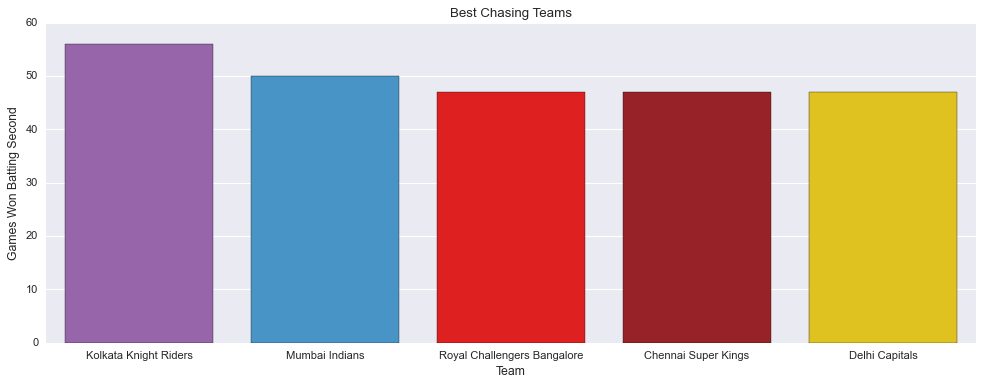

In [72]:
plt.style.use(['seaborn'])
plt.figure(figsize=(15,5))
enmax_palette = ['#9b59b6', '#3498db','red', '#aa1016','gold']
sns.set_palette(palette=enmax_palette)
ax=sns.barplot(list(bat_second['Winner'].value_counts()[0:5].keys()),list(bat_second['Winner'].value_counts()[0:5]))
ax.set(xlabel='Team', ylabel='Games Won Batting Second',title='Best Chasing Teams')


In [73]:
w1=np.sum(batting_first) #Calculating number of wins for teams batting first
w1

333

In [74]:
w2=np.sum(batting_second) #Calculating number of wins for teams batting first
w2

402

##### Teams batting second have won more games in the IPL from 2008 to 2019
##### Chasing games would be preferred as compared to setting targets in the IPL

In [75]:
extras=balls.groupby(['bowling_team'])['extra_runs'].sum().sort_values(ascending=False) #Checking which teams have leaked away most runs
extras[:7]

bowling_team
Mumbai Indians                 1612
Royal Challengers Bangalore    1558
Kings XI Punjab                1453
Delhi Capitals                 1384
Kolkata Knight Riders          1372
Rajasthan Royals               1245
Chennai Super Kings            1213
Name: extra_runs, dtype: int64

##### MI have given away the maximum runs in extras(wides,byes,leg-byes and no-balls)
##### Among the teams that have played atleast 10 seasons CSK have produced the least extras in the IPL


In [76]:
winner_venue_top_10 = ipl.groupby(["Winner",'Venue','City'])['ID'].count().sort_values(ascending=False)[:10]
winner_venue_top_10 #Displaying the Top 10 teams with the most wins in different venues

Winner                       Venue                               City      
Kolkata Knight Riders        Eden Gardens                        Kolkata       45
Mumbai Indians               Wankhede Stadium                    Mumbai        42
Chennai Super Kings          M.A. Chidambaram Stadium            Chennai       40
Rajasthan Royals             Sawai Mansingh Stadium              Jaipur        32
Delhi Capitals               Feroz Shah Kotla                    Delhi         31
Sunrisers Hyderabad          Rajiv Gandhi International Stadium  Hyderabad     30
Royal Challengers Bangalore  M. Chinnaswamy Stadium              Bangalore     29
Kings XI Punjab              Punjab Cricket Association Stadium  Chandigarh    22
Mumbai Indians               Eden Gardens                        Kolkata       10
                             M. Chinnaswamy Stadium              Bangalore      8
Name: ID, dtype: int64

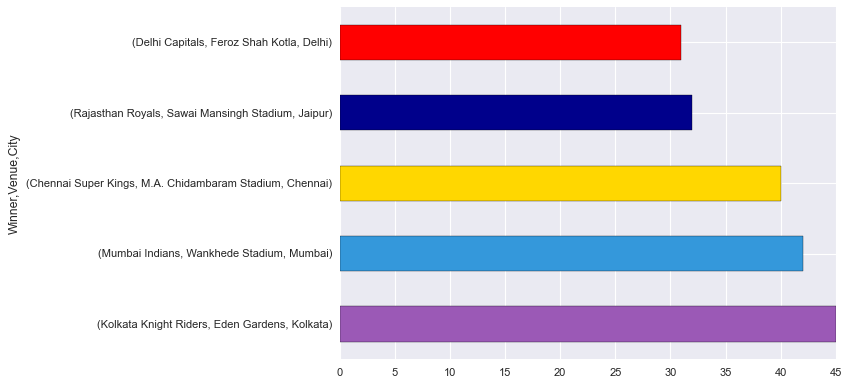

In [77]:
plt.style.use(['seaborn-muted'])
winner_venue_top_10[0:5].plot(kind='barh',color=['#9b59b6','#3498db','gold','darkblue','red'])#Plotting the Top 5 teams with most home wins

##### KKR has the best home record closely followed by MI and CSK
##### It would be difficult to beat these teams at their home ground
##### RR and DC also have good home record
##### MI has the best away record among all the teams winning 10 games at the Eden Gardens

In [78]:
ipl_champions=ipl.drop_duplicates(subset=['Season'], keep='last')[['Season','Winner']].reset_index(drop=True)
ipl_champions = ipl_champions['Winner'].value_counts()

ipl_champions = ipl_champions.to_frame()
ipl_champions.reset_index(inplace=True)
ipl_champions.rename(columns={'index':'Team'},inplace=True)
ipl_champions

Team  Winner
0         Mumbai Indians       4
1    Chennai Super Kings       3
2  Kolkata Knight Riders       2
3        Deccan Chargers       1
4       Rajasthan Royals       1
5    Sunrisers Hyderabad       1

Text(0.5, 1.0, 'Teams with most IPL Trophies')

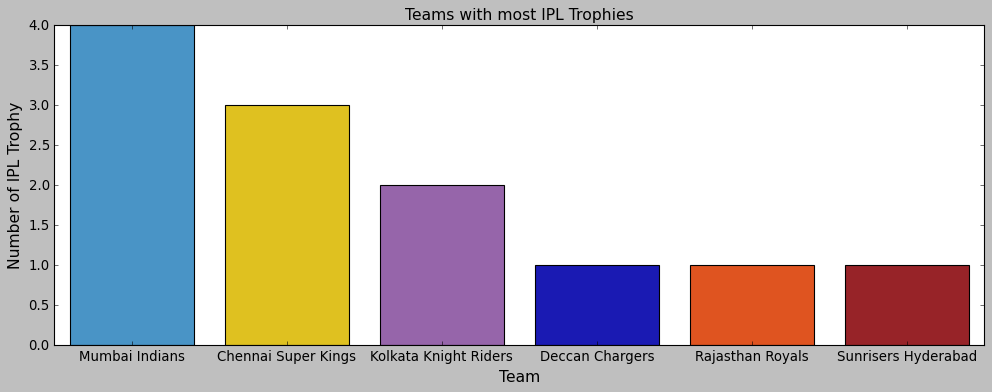

In [79]:
plt.style.use(['classic'])
plt.figure(figsize=(15,5))
enmax_palette = ['#3498db','gold', '#9b59b6','mediumblue', 'orangered','#aa1016']
sns.set_palette(palette=enmax_palette)
sns.barplot(x=ipl_champions['Team'],y=ipl_champions['Winner'])
plt.xlabel('Team',fontsize=14)
plt.ylabel('Number of IPL Trophy',fontsize=14)
plt.title('Teams with most IPL Trophies',fontsize=14)

##### MI have won the IPL the maximum number of times(4)
##### CSK comes second with 3 IPL trophies
##### KKR has won the tournament twice
##### RR, DC, SRH have won the IPL one time each

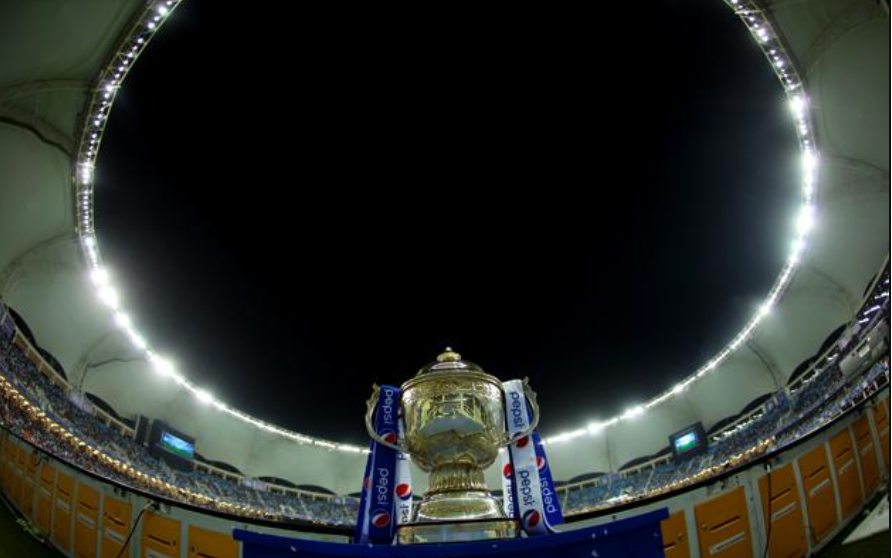

In [80]:
Image(filename="Capture1.png",width=700,height=500)